In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import os
from random import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,classification_report
import json
from matplotlib.patches import Rectangle
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Dropout,MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping 
from keras.optimizers import RMSprop

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
from keras.models import load_model
path_mask='D:\\covid-19 mask detection\\image\\mask_with_coodinate\\'
path_normal='D:\\covid-19 mask detection\\image\\normal_with_coodinate\\'

In [50]:
local=load_model('om.h5')
#classifier=load_model('vgg_om.h5')

In [51]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", 
       len(tf.config.experimental.list_physical_devices('GPU')))
# Checking the version for incompatibilities and GPU list devices 
# for a fast check on GPU drivers installation. 

model_filepath = 'D:\\covid-19 mask detection\\vgg_om.h5'

classifier = tf.keras.models.load_model(
    model_filepath,
    custom_objects=None,
    compile=False
)

1.14.0
Num GPUs Available:  0


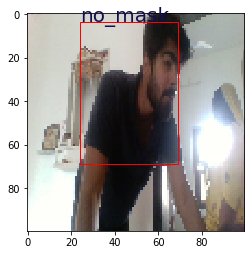

[[0.2122112  0.021145   0.44303018 0.6704461 ]]
[1]


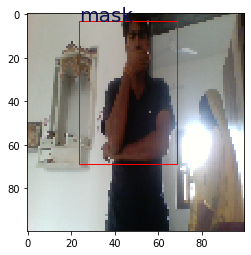

[[0.2122112  0.021145   0.44303018 0.6704461 ]]
[0]


In [82]:

path='D:\\covid-19 mask detection\\mask1\\'
for i in os.listdir(path):
    fig,ax = plt.subplots(1)
    new_path=path+i
    im = np.array(Image.open(new_path), dtype=np.uint8)
    im = cv2.resize(im,(100,100))
    img=cv2.imread(new_path)
    plt.imshow(im)
    img=cv2.resize(img,(100,100))
    img=img.reshape(-1,100,100,3)
    p=local.predict(img)
    x=p[0][0]*100
    y=p[0][1]*100
    w=p[0][2]*100
    h=p[0][3]*100
    classes=classifier.predict(img)
    classes=np.argmax(classes,axis=1)
    if classes[0]==0:
        s="mask"
    elif classes[0]==1:
        s='no_mask'
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y, s,color='#100f4f',fontsize=20)
    ax.imshow(im) 
    plt.show()
    print(coodinate)
    print(classes)
